# Acquire Exercises

All of the exercises for this module should be done within your ds-methodologies repository, inside of a directory named time_series.

In [1]:
import requests
import pandas as pd

In [11]:
response = requests.get(base_url + '/documentation')
print(response.json()['payload'])


The API accepts GET requests for all endpoints, where endpoints are prefixed
with

    /api/{version}

Where version is "v1"

Valid endpoints:

- /stores[/{store_id}]
- /items[/{item_id}]
- /sales[/{sale_id}]

All endpoints accept a `page` parameter that can be used to navigate through
the results.



## 1. Using the code from the lesson as a guide, create a dataframe named items that has all of the data for items.

In [2]:
base_url = 'https://python.zach.lol'
print(requests.get(base_url).text)

{"api":"/api/v1","help":"/documentation"}



In [101]:
response = requests.get('https://python.zach.lol/api/v1/items')

data = response.json()


In [105]:
df = pd.DataFrame(data["payload"]["items"])

[{'item_brand': 'Riceland',
  'item_id': 1,
  'item_name': 'Riceland American Jazmine Rice',
  'item_price': 0.84,
  'item_upc12': '35200264013',
  'item_upc14': '35200264013'},
 {'item_brand': 'Caress',
  'item_id': 2,
  'item_name': 'Caress Velvet Bliss Ultra Silkening Beauty Bar - 6 Ct',
  'item_price': 6.44,
  'item_upc12': '11111065925',
  'item_upc14': '11111065925'},
 {'item_brand': 'Earths Best',
  'item_id': 3,
  'item_name': 'Earths Best Organic Fruit Yogurt Smoothie Mixed Berry',
  'item_price': 2.43,
  'item_upc12': '23923330139',
  'item_upc14': '23923330139'},
 {'item_brand': 'Boars Head',
  'item_id': 4,
  'item_name': 'Boars Head Sliced White American Cheese - 120 Ct',
  'item_price': 3.14,
  'item_upc12': '208528800007',
  'item_upc14': '208528800007'},
 {'item_brand': 'Back To Nature',
  'item_id': 5,
  'item_name': 'Back To Nature Gluten Free White Cheddar Rice Thin Crackers',
  'item_price': 2.61,
  'item_upc12': '759283100036',
  'item_upc14': '759283100036'},
 {'i

In [20]:
response = requests.get(base_url + data['payload']['next_page'])
data = response.json()

print('max_page: %s' % data['payload']['max_page'])
print('next_page: %s' % data['payload']['next_page'])

df = pd.concat([df, pd.DataFrame(data['payload']['items'])]).reset_index()

max_page: 3
next_page: /api/v1/items?page=3


In [21]:
response = requests.get(base_url + data['payload']['next_page'])
data = response.json()

print('max_page: %s' % data['payload']['max_page'])
print('next_page: %s' % data['payload']['next_page'])

df = pd.concat([df, pd.DataFrame(data['payload']['items'])]).reset_index()

max_page: 3
next_page: None


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [89]:
df.shape

(50, 8)

In [90]:
df

,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1.0,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,2,2.0,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,3,3.0,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,4,4.0,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036
5,5,5.0,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732
6,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004
7,7,7.0,Lea & Perrins,8,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,51600080015,51600080015
8,8,8.0,Van De Kamps,9,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015
9,9,9.0,Ahold,10,Ahold Cocoa Almonds,3.17,688267141676,688267141676


## 2.Do the same thing, but for stores.

In [72]:
response = requests.get('https://python.zach.lol/api/v1/stores')

data = response.json()
df_stores = pd.DataFrame(data["payload"]["stores"])
df_stores

,store_address,store_city,store_id,store_state,store_zipcode
0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,9255 FM 471 West,San Antonio,2,TX,78251
2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
3,516 S Flores St,San Antonio,4,TX,78204
4,1520 Austin Hwy,San Antonio,5,TX,78218
5,1015 S WW White Rd,San Antonio,6,TX,78220
6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
7,15000 San Pedro Ave,San Antonio,8,TX,78232
8,735 SW Military Dr,San Antonio,9,TX,78221
9,8503 NW Military Hwy,San Antonio,10,TX,78231


## 3. Extract the data for sales. There are a lot of pages of data here, so your code will need to be a little more complex. Your code should continue fetching data from the next page until all of the data is extracted.

In [73]:
response = requests.get('https://python.zach.lol/api/v1/sales')

data = response.json()
data.keys()

dict_keys(['payload', 'status'])

In [74]:
df_sales = pd.DataFrame(data["payload"]["sales"])

In [75]:
df_sales.shape

(5000, 5)

In [48]:
df_sales

,item,sale_amount,sale_date,sale_id,store
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
...,...,...,...,...,...
4995,1,23.0,"Mon, 05 Sep 2016 00:00:00 GMT",4996,3
4996,1,22.0,"Tue, 06 Sep 2016 00:00:00 GMT",4997,3
4997,1,21.0,"Wed, 07 Sep 2016 00:00:00 GMT",4998,3
4998,1,22.0,"Thu, 08 Sep 2016 00:00:00 GMT",4999,3


In [85]:
# Create the first response 
response = requests.get('https://python.zach.lol/api/v1/sales')
# Parse the data as a json
data = response.json()
# Turn the first page into a df
df_sales = pd.DataFrame(data["payload"]["sales"])

for i in range(data['payload']['max_page']-1):
    response = requests.get(base_url + data['payload']['next_page'])
    data = response.json()
    df_sales = pd.concat([df_sales, pd.DataFrame(data['payload']['sales'])]).reset_index(drop=True)

In [86]:
df_sales.to_csv("store_sales.csv")

### 4.Combine the data from your three separate dataframes into one large dataframe.

In [92]:
df_sales_store = df_sales.merge(df_stores, how="left", left_on="store", right_on="store_id")

In [94]:
df_sales_store = df_sales_store.merge(df, how="left", left_on="item", right_on="item_id")

In [95]:
df_sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 18 columns):
item             913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store            913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_id         913000 non-null int64
store_state      913000 non-null object
store_zipcode    913000 non-null object
level_0          913000 non-null int64
index            730400 non-null float64
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null object
item_upc14       913000 non-null object
dtypes: float64(3), int64(6), object(9)
memory usage: 132.3+ MB


In [98]:
df = df_sales_store.drop(columns=["level_0", "index","store_id"])

In [100]:
df.to_csv("merged_sales_data.csv")

### 5. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. 

You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [107]:
base_url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

In [121]:
response = requests.get(base_url)
print(requests.get(base_url).text)

Date,Consumption,Wind,Solar,Wind+Solar
2006-01-01,1069.1840000000002,,,
2006-01-02,1380.5210000000002,,,
2006-01-03,1442.5330000000001,,,
2006-01-04,1457.2169999999999,,,
2006-01-05,1477.131,,,
2006-01-06,1403.4270000000001,,,
2006-01-07,1300.2870000000003,,,
2006-01-08,1207.9849999999997,,,
2006-01-09,1529.3229999999996,,,
2006-01-10,1576.911,,,
2006-01-11,1577.1759999999997,,,
2006-01-12,1553.28,,,
2006-01-13,1545.0019999999997,,,
2006-01-14,1359.945,,,
2006-01-15,1265.475,,,
2006-01-16,1563.738,,,
2006-01-17,1598.3029999999999,,,
2006-01-18,1572.9840000000004,,,
2006-01-19,1558.29,,,
2006-01-20,1540.6039999999998,,,
2006-01-21,1348.188,,,
2006-01-22,1248.111,,,
2006-01-23,1569.691,,,
2006-01-24,1603.2520000000006,,,
2006-01-25,1613.3119999999997,,,
2006-01-26,1601.6729999999995,,,
2006-01-27,1586.0649999999998,,,
2006-01-28,1373.0300000000002,,,
2006-01-29,1252.2149999999997,,,
2006-01-30,1554.7219999999998,,,
2006-01-31,1575.1290000000004,,,
2006-02-01,1582.1340000000002,,,
2006-02

In [188]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df =pd.read_csv(url)

In [192]:
df = df.fillna(0)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           4383 non-null float64
Solar          4383 non-null float64
Wind+Solar     4383 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [197]:
df.Date = pd.to_datetime(df.Date)

In [212]:
df["percent_renewable"] = df["Wind+Solar"] / df.Consumption

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

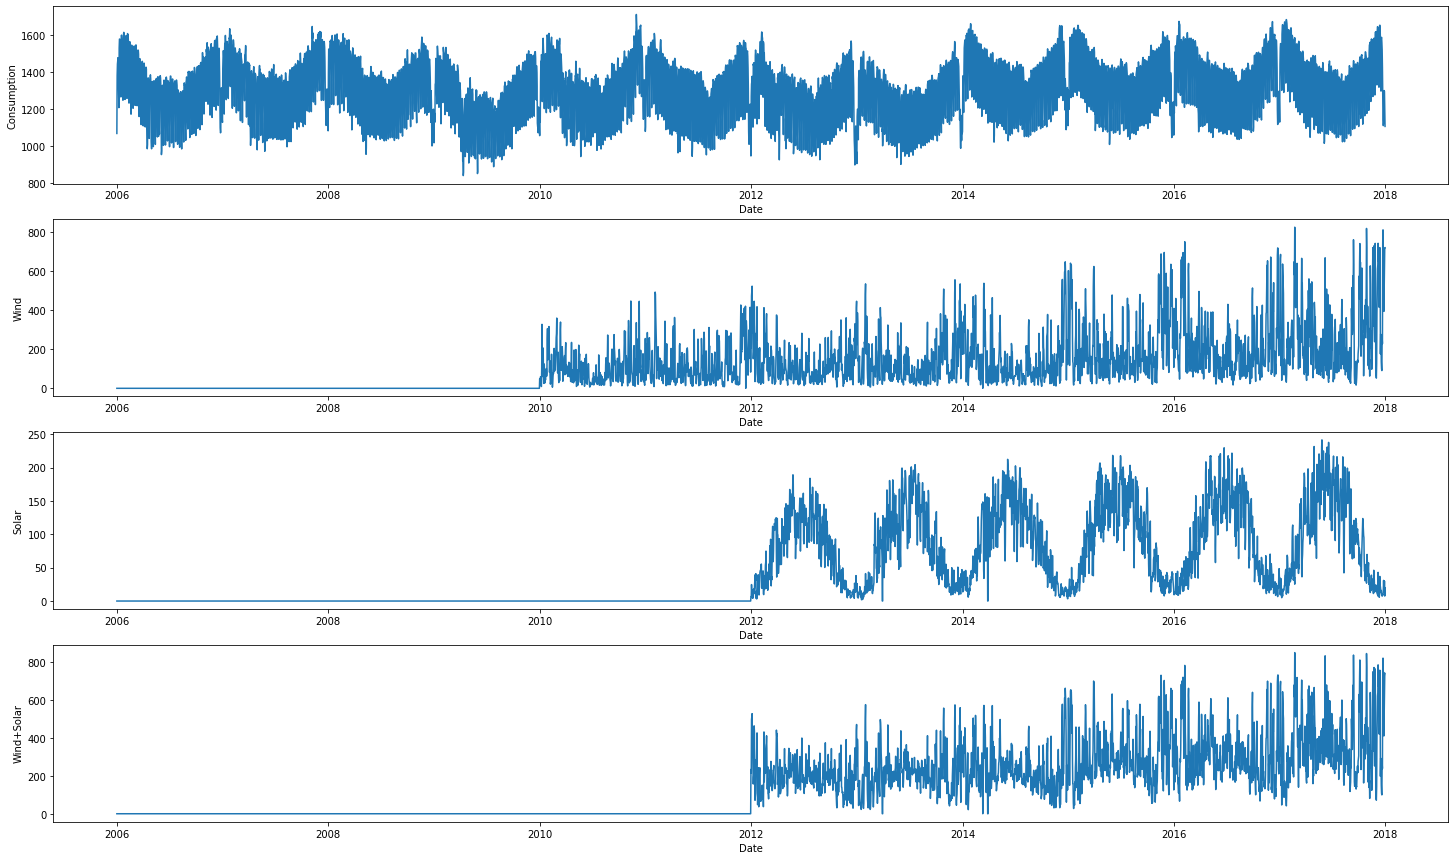

In [215]:
f , axes = plt.subplots(4,1, figsize=(25,15))
sns.lineplot(x="Date", y="Consumption", data=df, ax=axes[0])
sns.lineplot(x="Date", y="Wind", data=df, ax=axes[1])
sns.lineplot(x="Date", y="Solar", data=df, ax=axes[2])
sns.lineplot(x="Date", y="Wind+Solar", data=df, ax=axes[3])

It is surpirsing that consumption of energy has remained relatively stable. It would be interesting to be able to look at a more granular level (month) to see what months have lower consumption, and which ones have higher.

# Test the functions

In [224]:
import acquire

In [227]:
data = acquire.create_merged_report()

/Users/danielguerrero/codeup_data_science/ds-methodologies-exercises/time_series/acquire.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, pd.DataFrame(data['payload']['items'])]).reset_index()


In [228]:
data.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [229]:
data.shape

(913000, 15)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 15 columns):
item             913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null object
sale_id          913000 non-null int64
store            913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null object
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null object
item_upc14       913000 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 111.5+ MB


In [231]:
data['sale_date'] = pd.to_datetime(data['sale_date'])

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 15 columns):
item             913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null datetime64[ns, UTC]
sale_id          913000 non-null int64
store            913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null object
item_brand       913000 non-null object
item_id          913000 non-null int64
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null object
item_upc14       913000 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(8)
memory usage: 111.5+ MB


In [ ]:
data.to_csv("store_sales.csv")